In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

spliting dataset into train and test

In [40]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [42]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


(None, <matplotlib.image.AxesImage at 0x1b3d34c9a90>)

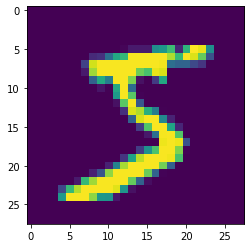

In [44]:
print(y_train[0]), plt.imshow(X_train[0])

scaling on 0 to 1 values instead than 0 to 255 values

In [45]:
X_train = X_train / 255
X_test = X_test / 255

In [46]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

reshaping train and test sets

In [52]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [53]:
X_train_flattened[0].shape

(784,)

train the model 

In [54]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4712 - accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9250
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9276
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.9265


[0.2708294093608856, 0.9265000224113464]

In [79]:
X_test_flattened[0].shape

(784,)

test with preditions

In [80]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.9677219e-03, 1.4668139e-08, 8.5156346e-03, 9.5431429e-01,
       1.6822418e-03, 1.9199653e-01, 1.8681066e-08, 9.9978483e-01,
       7.7060029e-02, 6.0890859e-01], dtype=float32)

In [81]:
X_test_flattened.shape, y_predicted.shape

((10000, 784), (10000, 10))

In [82]:
results = np.argmax(y_predicted, axis = 1)
print(results)

[7 2 1 ... 4 5 6]


In [83]:
results.shape

(10000,)

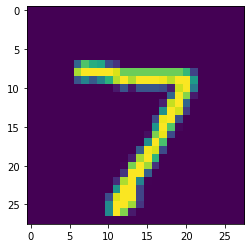

In [84]:
plt.imshow(X_test[0])

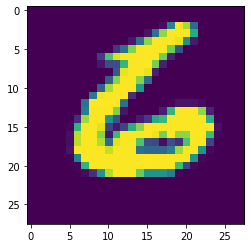

In [85]:
plt.imshow(X_test[-1])